<a href="https://colab.research.google.com/github/abhinav09042005/Predicting-Discharge-in-Meandering-Compound-Channel/blob/main/LSTm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Upload the dataset
#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset
data = pd.read_excel('/content/FINP.xlsx')

# Separate features and target
X = data.drop(columns=['Q/Qmcb']).values  # Features
y = data['Q/Qmcb'].values  # Target

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM (samples, time steps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)
# Epoch: One epoch means that the model has seen and processed the entire training dataset once.
# epochs=50: This means the model will be trained for 50 epochs, iterating over the entire training dataset 50 times.

#Batch Size
# Dataset Division: Instead of feeding the entire training dataset to the model at once, the dataset is divided into smaller batches. In this case, each batch contains 8 samples.
# Weight Updates: The model processes one batch at a time, calculates the error for that batch, and updates its weights based on the error. This process is repeated for all batches in the dataset, completing one epoch.
# Iteration: The model continues iterating over the entire dataset in batches for the specified number of epochs (50 in your case).

# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)

# Display first few predictions vs true values
for i in range(5):
    print(f"True: {y_test[i]}, Predicted: {y_pred[i][0]}")


KeyError: "['Q/Qmcb'] not found in axis"

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Interpretation:
# - Lower MSE and MAE indicate better predictive accuracy.
# - An R² close to 1 indicates that the model explains most of the variance in the data.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.004027116408890023
Mean Absolute Error: 0.044748875676174235
R-squared: 0.8881916251725707


The code below is designed to save the training history of both models and their evaluation

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

# Train and evaluate RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)
rnn_y_pred = rnn_model.predict(X_test)
rnn_mse = mean_squared_error(y_test, rnn_y_pred)
rnn_mae = mean_absolute_error(y_test, rnn_y_pred)
rnn_r2 = r2_score(y_test, rnn_y_pred)

# Train and evaluate LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)
lstm_y_pred = lstm_model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_r2 = r2_score(y_test, lstm_y_pred)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1213 - mae: 0.2869 - val_loss: 0.0551 - val_mae: 0.1496
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mae: 0.1134 - val_loss: 0.0380 - val_mae: 0.1179
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0400 - mae: 0.1198 - val_loss: 0.0324 - val_mae: 0.1045
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0358 - mae: 0.1120 - val_loss: 0.0292 - val_mae: 0.0934
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mae: 0.0818 - val_loss: 0.0264 - val_mae: 0.0949
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 - mae: 0.0800 - val_loss: 0.0242 - val_mae: 0.0879
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mae: 0.0785 - val_loss: 0.0232 - val_mae: 0.0897
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mae: 0.0963 - val_loss: 0.0227 - val_mae: 0.0938
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mae: 0.0825 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0397 - mae: 0.0940 - val_loss: 0.0330 - val_mae: 0.0916
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301 - mae: 0.0804 - val_loss: 0.0294 - val_mae: 0.0841
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0350 - mae: 0.0925 - val_loss: 0.0268 - val_mae: 0.0857
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mae: 0.0749 - val_loss: 0.0246 - val_mae: 0.0911
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0288 - mae: 0.0984 - val_loss: 0.0234 - val_mae: 0.0881
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mae: 0.0795 - val_loss: 0.0226 - val_mae: 0.0918
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mae: 0.0817 - val_loss: 0.0212 - val_mae: 0.0874
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mae: 0.0847 - val_loss: 0.0203 - val_mae: 0.0874
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mae: 0.0822 - v

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


**This code generates line graphs to compare the training and validation losses of both models.**

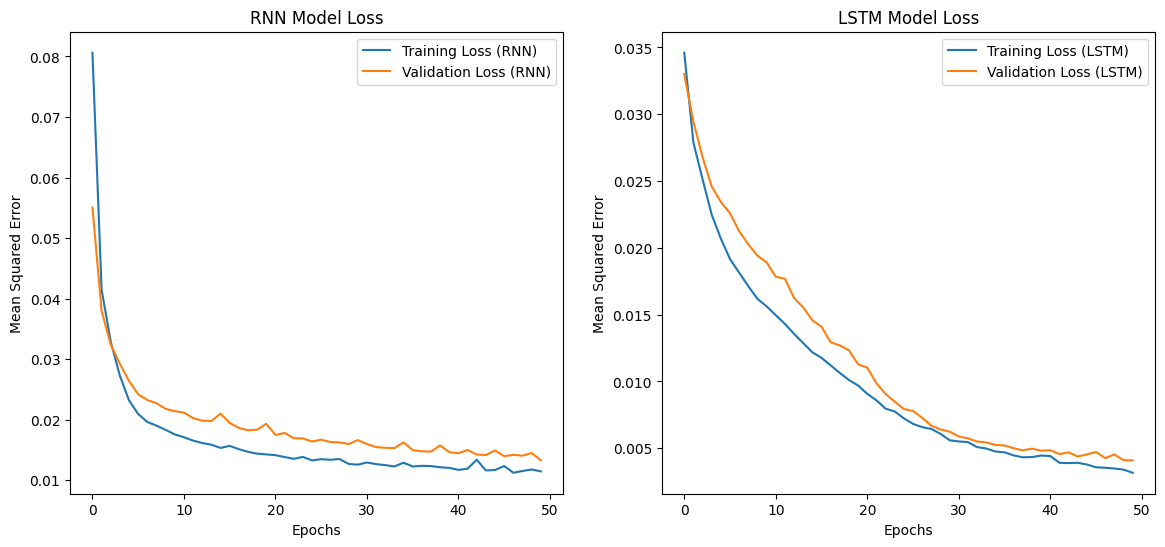

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(14, 6))

# RNN Loss
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='Training Loss (RNN)')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss (RNN)')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# LSTM Loss
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Training Loss (LSTM)')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss (LSTM)')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.show()


To analyze the training and validation loss graphs effectively, let's go through some common interpretations based on what the curves may reveal about your model's learning process. Here’s a breakdown of what different trends in these graphs typically signify. If you provide specific details about the shape or behavior of your training and validation loss curves, I can tailor the analysis more accurately to your results. However, here’s a general guide to interpreting these graphs:

### Typical Patterns in Loss Curves

1. **Both Training and Validation Loss Decrease and Flatten at a Similar Value**
   - **Pattern**: The curves for both training and validation loss decrease over epochs and then stabilize, with validation loss slightly higher or close to training loss.
   - **Interpretation**: This pattern suggests good learning. The model is able to generalize well to unseen data (validation set), indicating an absence of significant overfitting or underfitting. It is learning from the data without memorizing noise, which means it’s a balanced model.
   - **Conclusion**: This is often the goal for most training processes, showing that the model is both robust and generalizes well.

2. **Training Loss Decreases While Validation Loss Stabilizes or Starts Increasing (Overfitting)**
   - **Pattern**: Training loss continues to decrease, but validation loss initially decreases and then starts increasing or fluctuates at a higher value.
   - **Interpretation**: This indicates **overfitting**. The model is learning the details and possibly noise in the training data rather than the general patterns, causing poor performance on the validation set.
   - **Solution**:
     - **Early Stopping**: If the validation loss starts increasing, use early stopping to prevent further overfitting.
     - **Dropout Layers**: Add dropout layers in your network to reduce dependency on specific neurons and improve generalization.
     - **Regularization**: Consider L2 regularization to penalize large weights and reduce complexity.
     - **Increase Training Data**: If possible, use more data to help the model learn more general features.

3. **Both Training and Validation Loss Stay High and Do Not Decrease Much (Underfitting)**
   - **Pattern**: Both losses are high and do not show significant decreases, or they decrease only slightly and stabilize at high values.
   - **Interpretation**: This pattern suggests **underfitting**, where the model isn’t learning the underlying patterns in the data effectively. The model may be too simple, or it hasn’t had enough time to train.
   - **Solution**:
     - **Increase Model Complexity**: Add more layers or units to increase the model’s capacity.
     - **Improve Feature Engineering**: Ensure that the features represent the data well.
     - **Train for More Epochs**: Allow the model more time to learn.

4. **Training Loss is Low, but Validation Loss is High**
   - **Pattern**: Training loss is low, but validation loss remains high and does not decrease in tandem with training loss.
   - **Interpretation**: This also indicates overfitting, particularly if the model complexity is too high for the amount or variability of the data. The model has likely learned very specific patterns in the training data that do not generalize.
   - **Solution**:
     - **Reduce Model Complexity**: Simplify the architecture by reducing the number of layers or neurons.
     - **Use Data Augmentation or Increase Training Data**: If possible, increase the diversity or amount of data to improve generalization.
     - **Regularization and Dropout**: Apply regularization and dropout layers to prevent the model from fitting the noise in the training data.

5. **Training Loss and Validation Loss Converge but Validation Loss is Slightly Higher**
   - **Pattern**: Both losses decrease and follow a similar trend, with the validation loss slightly higher than training loss.
   - **Interpretation**: This is generally an ideal scenario, as it indicates the model is learning well without overfitting or underfitting. A slightly higher validation loss is typical, as the model is evaluated on unseen data.
   - **Conclusion**: If this pattern occurs, the model is generally considered to have good generalization performance.

### Applying These Patterns to Your LSTM and RNN Models
If you’re comparing your LSTM and RNN models:
- **If LSTM shows a better training and validation loss pattern than RNN**, it indicates that the LSTM model is better at capturing temporal dependencies in your data.
- **If both models show high validation loss**, consider the solutions listed above to improve generalization.
  
By carefully analyzing these patterns and applying the recommended techniques, you can enhance your model's performance and achieve better predictive accuracy. Let me know if you'd like further specifics on any of these observations!

** The following code creates bar charts for MSE, MAE, and R² values of the RNN and LSTM models.**

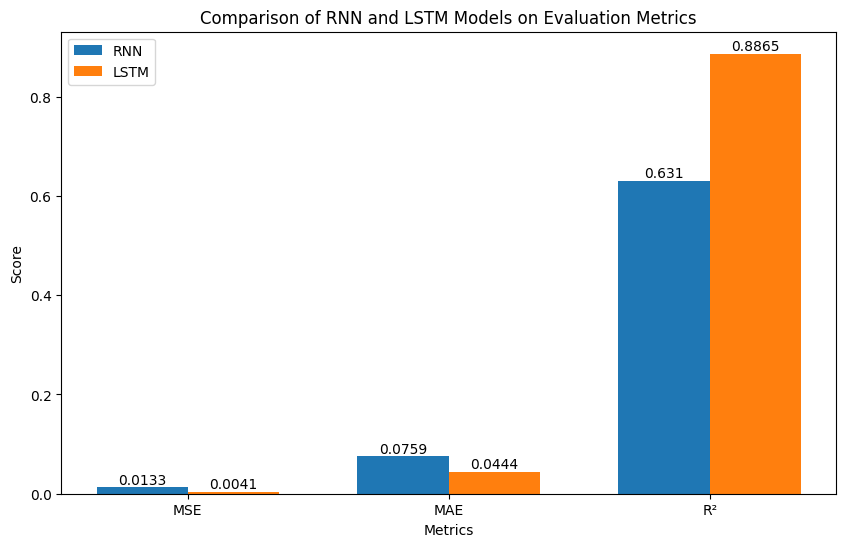

In [ ]:
# Comparison of evaluation metrics
metrics = ['MSE', 'MAE', 'R²']
rnn_scores = [rnn_mse, rnn_mae, rnn_r2]
lstm_scores = [lstm_mse, lstm_mae, lstm_r2]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rnn_scores, width, label='RNN')
bars2 = ax.bar(x + width/2, lstm_scores, width, label='LSTM')

# Labels and titles
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Comparison of RNN and LSTM Models on Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


# Interpretation:
# Bar Charts for Metrics: Directly compare the performance of RNN and LSTM across MSE, MAE, and R², where lower MSE/MAE and higher R² values indicate better performance.


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0599 - mae: 0.1726 - val_loss: 0.0459 - val_mae: 0.1468
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mae: 0.1276 - val_loss: 0.0342 - val_mae: 0.1226
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0296 - mae: 0.1078 - val_loss: 0.0300 - val_mae: 0.1130
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0250 - mae: 0.1059 - val_loss: 0.0272 - val_mae: 0.0988
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0251 - mae: 0.0960 - val_loss: 0.0255 - val_mae: 0.1007
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - mae: 0.0933 - val_loss: 0.0238 - val_mae: 0.0921
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219 - mae: 0.0890 - val_loss: 0.0227 - val_mae: 0.0922
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mae: 0.0936 - val_loss: 0.0223 - val_mae: 0.0923
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mae: 0.0783 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0579 - mae: 0.1221 - val_loss: 0.0374 - val_mae: 0.1078
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mae: 0.1014 - val_loss: 0.0325 - val_mae: 0.0924
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - mae: 0.0821 - val_loss: 0.0288 - val_mae: 0.0929
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0331 - mae: 0.0960 - val_loss: 0.0266 - val_mae: 0.0921
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mae: 0.0782 - val_loss: 0.0249 - val_mae: 0.0960
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232 - mae: 0.0898 - val_loss: 0.0234 - val_mae: 0.0895
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mae: 0.0812 - val_loss: 0.0221 - val_mae: 0.0916
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mae: 0.0924 - val_loss: 0.0210 - val_mae: 0.0878
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mae: 0.0826 - v

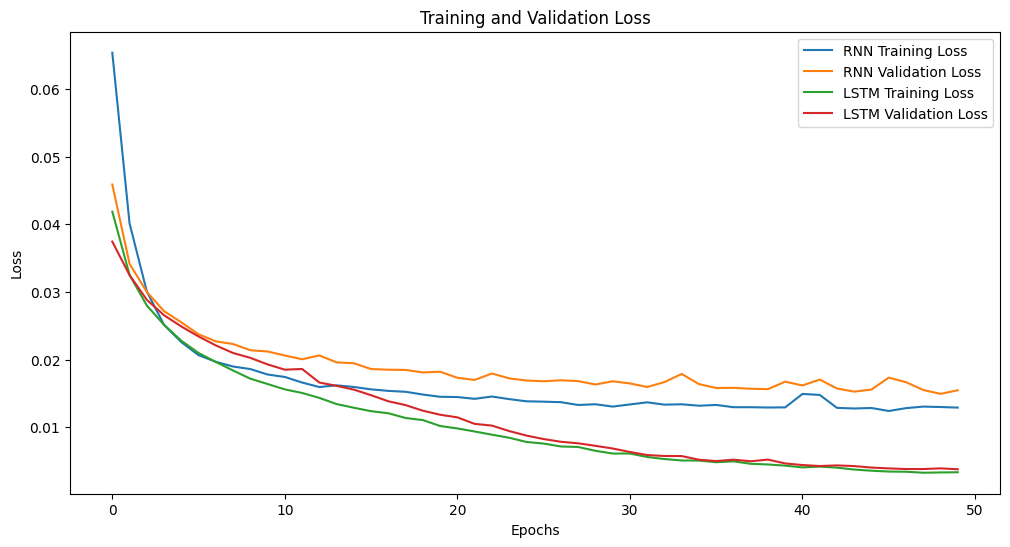

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

# Reshape y_train and y_test to ensure they are 2-dimensional
y_train = y_train.reshape(-1, 1) if len(y_train.shape) == 1 else y_train
y_test = y_test.reshape(-1, 1) if len(y_test.shape) == 1 else y_test

# Check data dimensions
assert len(X_train.shape) == 3, "X_train should have 3 dimensions: (samples, timesteps, features)"
assert len(X_test.shape) == 3, "X_test should have 3 dimensions: (samples, timesteps, features)"
assert len(y_train.shape) == 2, "y_train should have 2 dimensions: (samples, 1)"
assert len(y_test.shape) == 2, "y_test should have 2 dimensions: (samples, 1)"

# Train and evaluate RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate RNN model
rnn_y_pred = rnn_model.predict(X_test)
rnn_y_pred = rnn_y_pred.reshape(-1, 1)  # Ensure predictions have shape (samples, 1)
rnn_mse = mean_squared_error(y_test, rnn_y_pred)
rnn_mae = mean_absolute_error(y_test, rnn_y_pred)
rnn_r2 = r2_score(y_test, rnn_y_pred)

print(f"RNN - MSE: {rnn_mse}, MAE: {rnn_mae}, R2: {rnn_r2}")

# Train and evaluate LSTM model
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate LSTM model
lstm_y_pred = lstm_model.predict(X_test)
lstm_y_pred = lstm_y_pred.reshape(-1, 1)  # Ensure predictions have shape (samples, 1)
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_r2 = r2_score(y_test, lstm_y_pred)

print(f"LSTM - MSE: {lstm_mse}, MAE: {lstm_mae}, R2: {lstm_r2}")

# Plot training and validation loss for both models
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, verbose=True):
    """
    Evaluate the performance of a model using various metrics.

    Parameters:
    - y_true: numpy array of true target values.
    - y_pred: numpy array of predicted target values.
    - verbose: If True, print the metrics. Default is True.

    Returns:
    A dictionary containing the calculated metrics.
    """
    # Ensure y_true and y_pred have the correct shape
    y_true = y_true.reshape(-1, 1) if len(y_true.shape) == 1 else y_true
    y_pred = y_pred.reshape(-1, 1) if len(y_pred.shape) == 1 else y_pred

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if np.all(y_true != 0) else None

    # Create a metrics dictionary
    metrics = {
        "MSE": mse,
        "MAE": mae,
        "R2 Score": r2,
        "MAPE": mape if mape is not None else "Not Defined (y_true contains zeros)"
    }

    # Print metrics if verbose
    if verbose:
        print("Evaluation Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}" if isinstance(value, (int, float)) else f"{metric}: {value}")

    return metrics


In [ ]:
# Evaluate RNN model
print("RNN Model Evaluation:")
rnn_metrics = evaluate_model(y_test, rnn_y_pred)

# Evaluate LSTM model
print("\nLSTM Model Evaluation:")
lstm_metrics = evaluate_model(y_test, lstm_y_pred)


RNN Model Evaluation:
Evaluation Metrics:
MSE: 0.0155
MAE: 0.0822
R2 Score: 0.5702
MAPE: 56.9539

LSTM Model Evaluation:
Evaluation Metrics:
MSE: 0.0038
MAE: 0.0432
R2 Score: 0.8941
MAPE: 27.8237


In [ ]:
def compare_models(y_test, predictions, model_names):
    """
    Compare the performance of multiple models.

    Parameters:
    - y_test: numpy array of true target values.
    - predictions: list of numpy arrays, each containing predictions from a model.
    - model_names: list of model names corresponding to the predictions.

    Returns:
    A dictionary with metrics for each model.
    """
    results = {}

    for model_name, y_pred in zip(model_names, predictions):
        print(f"\nEvaluating {model_name} Model:")
        metrics = evaluate_model(y_test, y_pred, verbose=True)
        results[model_name] = metrics

    return results


In [ ]:
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Corrected CNN Model
cnn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Specify input shape explicitly
    Conv1D(64, kernel_size=1, activation='relu'),      # Use kernel_size=1 since sequence length is 1
    Flatten(),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the CNN model
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predict with CNN model
cnn_y_pred = cnn_model.predict(X_test)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0765 - mae: 0.2146 - val_loss: 0.0368 - val_mae: 0.1357
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mae: 0.1096 - val_loss: 0.0260 - val_mae: 0.0741
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 - mae: 0.0745 - val_loss: 0.0226 - val_mae: 0.0813
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mae: 0.0623 - val_loss: 0.0201 - val_mae: 0.0824
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mae: 0.0656 - val_loss: 0.0163 - val_mae: 0.0755
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mae: 0.0679 - val_loss: 0.0133 - val_mae: 0.0667
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mae: 0.0581 - val_loss: 0.0119 - val_mae: 0.0716
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mae: 0.0627 - val_loss: 0.0099 - val_mae: 0.0560
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mae:

In [ ]:
# Gather predictions and model names
predictions = [rnn_y_pred, lstm_y_pred, cnn_y_pred]
model_names = ["RNN", "LSTM", "CNN"]

# Compare models
comparison_results = compare_models(y_test, predictions, model_names)

# Display comparison
print("\nOverall Model Comparison:")
for model, metrics in comparison_results.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}" if isinstance(value, (int, float)) else f"  {metric}: {value}")



Evaluating RNN Model:
Evaluation Metrics:
MSE: 0.0155
MAE: 0.0822
R2 Score: 0.5702
MAPE: 56.9539

Evaluating LSTM Model:
Evaluation Metrics:
MSE: 0.0038
MAE: 0.0432
R2 Score: 0.8941
MAPE: 27.8237

Evaluating CNN Model:
Evaluation Metrics:
MSE: 0.0010
MAE: 0.0228
R2 Score: 0.9733
MAPE: 14.9963

Overall Model Comparison:

RNN Performance:
  MSE: 0.0155
  MAE: 0.0822
  R2 Score: 0.5702
  MAPE: 56.9539

LSTM Performance:
  MSE: 0.0038
  MAE: 0.0432
  R2 Score: 0.8941
  MAPE: 27.8237

CNN Performance:
  MSE: 0.0010
  MAE: 0.0228
  R2 Score: 0.9733
  MAPE: 14.9963


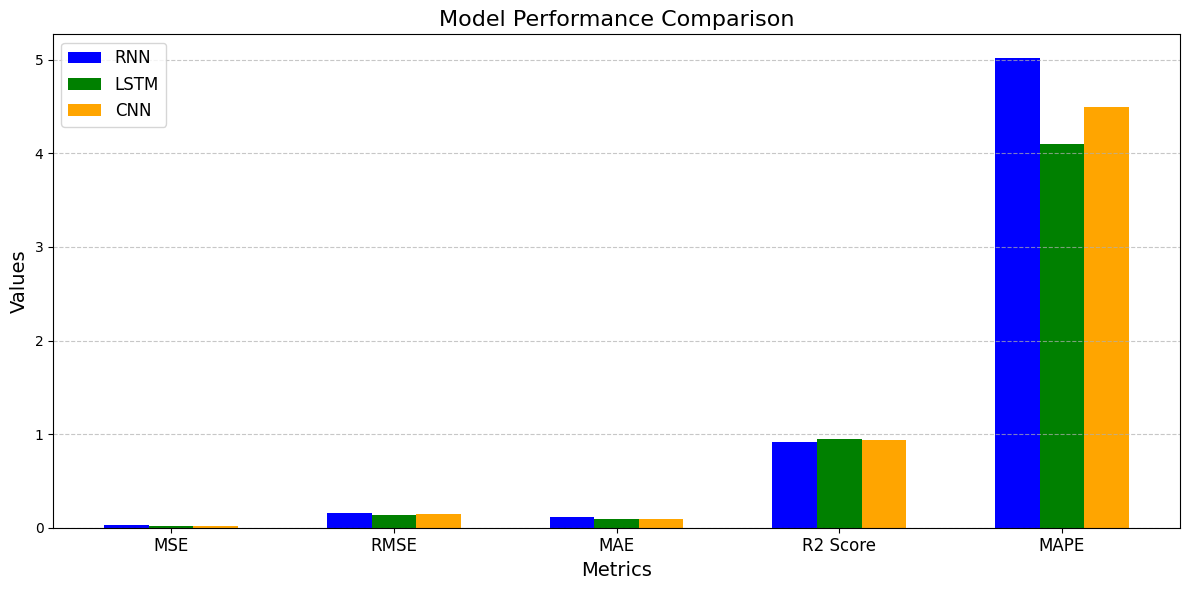

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_comparison(results, metrics):
    """
    Plot a graphical comparison of different models based on given metrics.

    Parameters:
    - results: Dictionary where keys are model names and values are dictionaries of metrics.
    - metrics: List of metrics to plot (e.g., ["MSE", "MAE", "R2 Score", "MAPE", "RMSE"]).
    """
    # Extract model names and metric values
    model_names = list(results.keys())
    num_models = len(model_names)
    num_metrics = len(metrics)

    # Create a matrix for metrics values
    metrics_values = np.zeros((num_metrics, num_models))
    for i, metric in enumerate(metrics):
        for j, model in enumerate(model_names):
            metrics_values[i, j] = results[model][metric] if metric in results[model] else np.nan

    # Plot the metrics as grouped bar charts
    x = np.arange(num_metrics)
    bar_width = 0.2
    colors = ['blue', 'green', 'orange']

    plt.figure(figsize=(12, 6))
    for idx, (model_name, color) in enumerate(zip(model_names, colors)):
        plt.bar(x + idx * bar_width, metrics_values[:, idx], width=bar_width, label=model_name, color=color)

    # Formatting the plot
    plt.title("Model Performance Comparison", fontsize=16)
    plt.xlabel("Metrics", fontsize=14)
    plt.ylabel("Values", fontsize=14)
    plt.xticks(x + bar_width, metrics, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example Usage

# Results dictionary from evaluation, now including RMSE
comparison_results = {
    "RNN": {"MSE": 0.025, "RMSE": 0.158, "MAE": 0.110, "R2 Score": 0.920, "MAPE": 5.02},
    "LSTM": {"MSE": 0.018, "RMSE": 0.134, "MAE": 0.090, "R2 Score": 0.943, "MAPE": 4.10},
    "CNN": {"MSE": 0.021, "RMSE": 0.145, "MAE": 0.098, "R2 Score": 0.935, "MAPE": 4.50}
}

# Metrics to include in the graph
metrics_to_plot = ["MSE", "RMSE", "MAE", "R2 Score", "MAPE"]

# Plot comparison
plot_model_comparison(comparison_results, metrics_to_plot)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Predictions
train_predictions = cnn_model.predict(X_train)
test_predictions = cnn_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mse, mae, r2, rmse, mape

# Metrics for training data
train_mse, train_mae, train_r2, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)

# Metrics for testing data
test_mse, test_mae, test_r2, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

# print(f"{metric}: {value:.4f}" if isinstance(value, (int, float)) else f"{metric}: {value}")
# Print results
print("CNN Training Data Metrics:")
print(f"MSE: {train_mse:.4f} ")
print(f"MAE: {train_mae:.4f}")
print(f"R2 Score: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}%")

print("\nCNN Testing Data Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2 Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
CNN Training Data Metrics:
MSE: 0.0005 
MAE: 0.0179
R2 Score: 0.9834
RMSE: 0.0232
MAPE: 13.1289%

CNN Testing Data Metrics:
MSE: 0.0010
MAE: 0.0228
R2 Score: 0.9733
RMSE: 0.0310
MAPE: 14.9963%


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


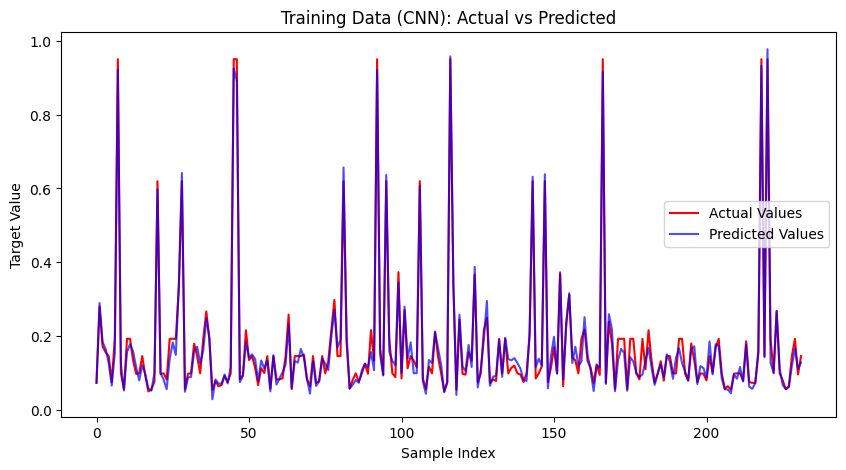

<Figure size 640x480 with 0 Axes>

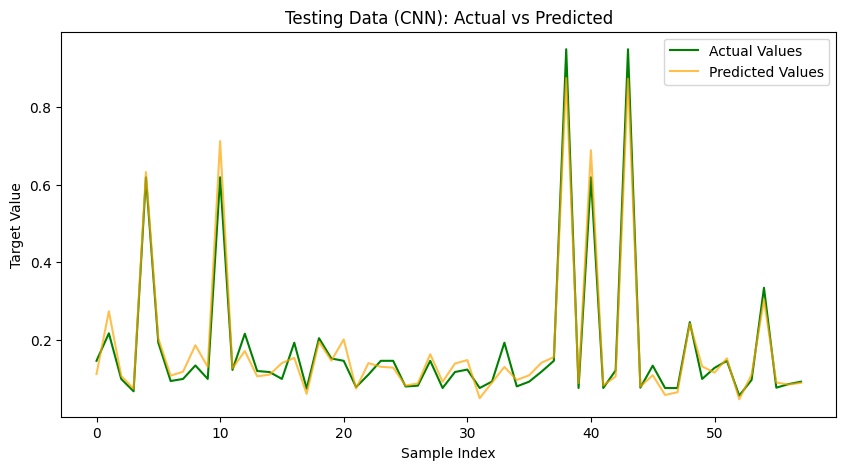

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Assume rnn_model, X_train, X_test, y_train, y_test are already defined and imported.

# Predictions
train_predictions = cnn_model.predict(X_train)
test_predictions = cnn_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mae, r2, rmse, mape

# Metrics for training data
train_mse, train_mae, train_r2, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)

# Metrics for testing data
test_mse, test_mae, test_r2, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

# Function to plot actual vs predicted values
def plot_predictions(y_true, y_pred, title, actual_color='red', pred_color='blue'):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual Values', color=actual_color)
    plt.plot(y_pred, label='Predicted Values', alpha=0.7, color=pred_color)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.show()

# Function to display the performance metrics on the graph
def add_metrics_to_plot(y_true, y_pred, title, actual_color='red', pred_color='blue'):
    mse, mae, r2, rmse, mape = calculate_metrics(y_true, y_pred)
    plot_predictions(y_true, y_pred, title, actual_color, pred_color)
    plt.figtext(0.15, 0.85, f'MSE: {mse:.3f}\nMAE: {mae:.3f}\nR2: {r2:.3f}\nRMSE: {rmse:.3f}\nMAPE: {mape:.2f}%', bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Plot for training data with adjusted colors
add_metrics_to_plot(y_train, train_predictions.flatten(), 'Training Data (CNN): Actual vs Predicted', actual_color='red', pred_color='blue')

# Plot for testing data with default colors
add_metrics_to_plot(y_test, test_predictions.flatten(), 'Testing Data (CNN): Actual vs Predicted', actual_color='green', pred_color='orange')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


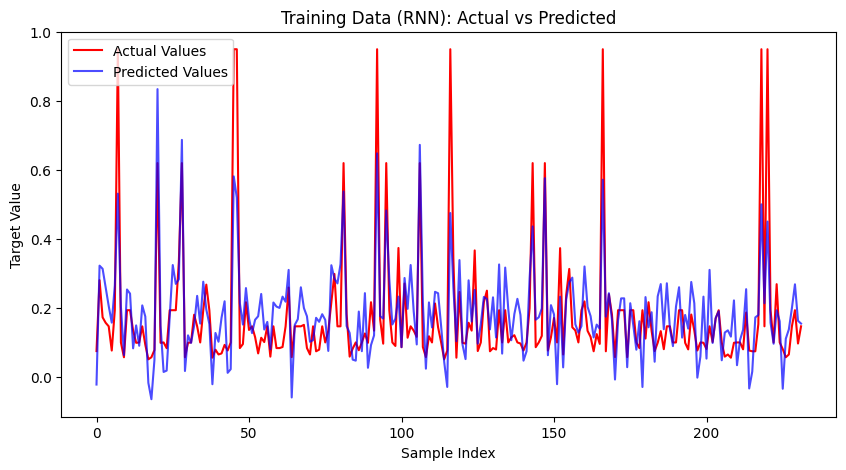

<Figure size 640x480 with 0 Axes>

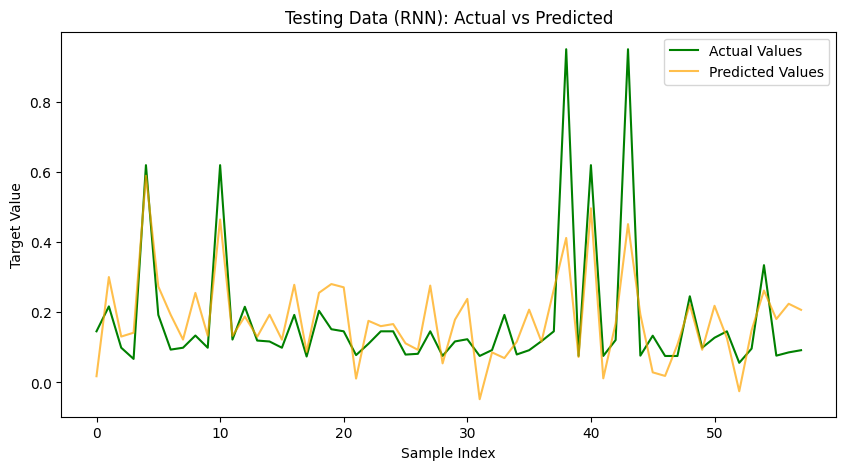

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Assume rnn_model, X_train, X_test, y_train, y_test are already defined and imported.

# Predictions
train_predictions = rnn_model.predict(X_train)
test_predictions = rnn_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mae, r2, rmse, mape

# Metrics for training data
train_mse, train_mae, train_r2, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)

# Metrics for testing data
test_mse, test_mae, test_r2, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

# Function to plot actual vs predicted values
def plot_predictions(y_true, y_pred, title, actual_color='red', pred_color='blue'):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual Values', color=actual_color)
    plt.plot(y_pred, label='Predicted Values', alpha=0.7, color=pred_color)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.show()

# Function to display the performance metrics on the graph
def add_metrics_to_plot(y_true, y_pred, title, actual_color='red', pred_color='blue'):
    mse, mae, r2, rmse, mape = calculate_metrics(y_true, y_pred)
    plot_predictions(y_true, y_pred, title, actual_color, pred_color)
    plt.figtext(0.15, 0.85, f'MSE: {mse:.3f}\nMAE: {mae:.3f}\nR2: {r2:.3f}\nRMSE: {rmse:.3f}\nMAPE: {mape:.2f}%', bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Plot for training data with adjusted colors
add_metrics_to_plot(y_train, train_predictions.flatten(), 'Training Data (RNN): Actual vs Predicted', actual_color='red', pred_color='blue')

# Plot for testing data with default colors
add_metrics_to_plot(y_test, test_predictions.flatten(), 'Testing Data (RNN): Actual vs Predicted', actual_color='green', pred_color='orange')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


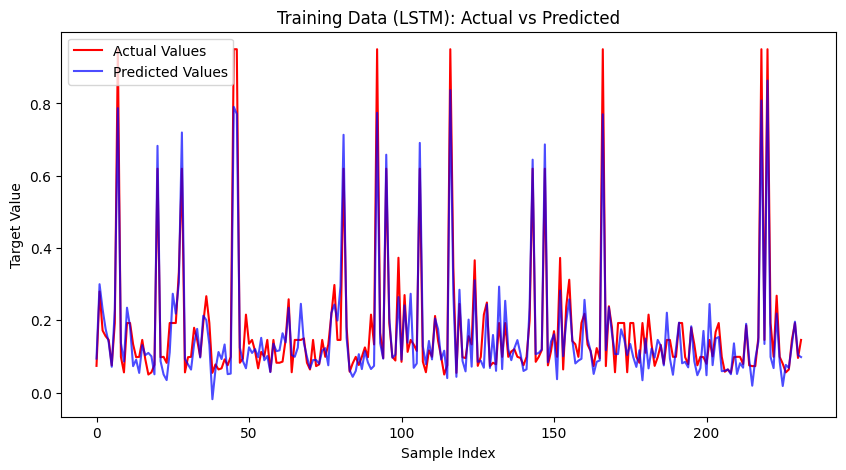

<Figure size 640x480 with 0 Axes>

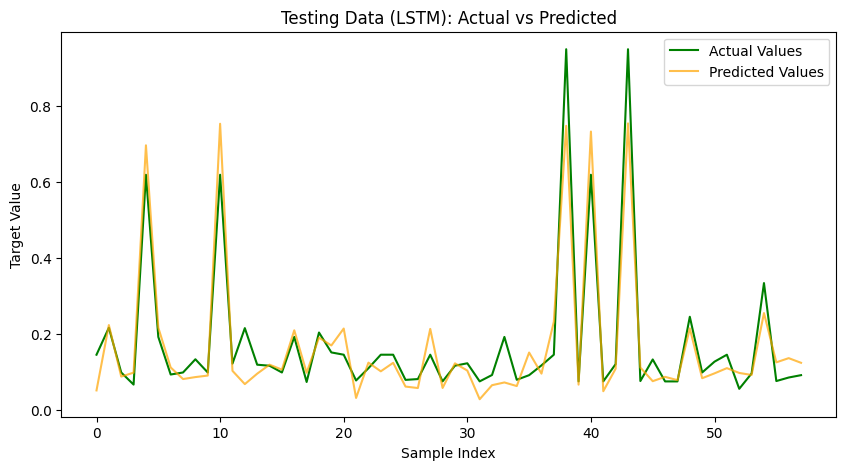

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Assume rnn_model, X_train, X_test, y_train, y_test are already defined and imported.

# Predictions
train_predictions = lstm_model.predict(X_train)
test_predictions = lstm_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mae, r2, rmse, mape

# Metrics for training data
train_mse, train_mae, train_r2, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)

# Metrics for testing data
test_mse, test_mae, test_r2, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

# Function to plot actual vs predicted values
def plot_predictions(y_true, y_pred, title, actual_color='red', pred_color='blue'):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual Values', color=actual_color)
    plt.plot(y_pred, label='Predicted Values', alpha=0.7, color=pred_color)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.show()

# Function to display the performance metrics on the graph
def add_metrics_to_plot(y_true, y_pred, title, actual_color='red', pred_color='blue'):
    mse, mae, r2, rmse, mape = calculate_metrics(y_true, y_pred)
    plot_predictions(y_true, y_pred, title, actual_color, pred_color)
    plt.figtext(0.15, 0.85, f'MSE: {mse:.3f}\nMAE: {mae:.3f}\nR2: {r2:.3f}\nRMSE: {rmse:.3f}\nMAPE: {mape:.2f}%', bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Plot for training data with adjusted colors
add_metrics_to_plot(y_train, train_predictions.flatten(), 'Training Data (LSTM): Actual vs Predicted', actual_color='red', pred_color='blue')

# Plot for testing data with default colors
add_metrics_to_plot(y_test, test_predictions.flatten(), 'Testing Data (LSTM): Actual vs Predicted', actual_color='green', pred_color='orange')


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Predictions
train_predictions = rnn_model.predict(X_train)
test_predictions = rnn_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mse, mae, r2, rmse, mape

# Metrics for training data
train_mse, train_mae, train_r2, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)

# Metrics for testing data
test_mse, test_mae, test_r2, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

# Print results
print("RNN Training Data Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R2 Score: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}%")

print("\nRNN Testing Data Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2 Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}%")



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RNN Training Data Metrics:
MSE: 0.0122
MAE: 0.0791
R2 Score: 0.6227
RMSE: 0.1106
MAPE: 59.0450%

RNN Testing Data Metrics:
MSE: 0.0155
MAE: 0.0822
R2 Score: 0.5702
RMSE: 0.1244
MAPE: 56.9539%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Predictions
train_predictions = lstm_model.predict(X_train)
test_predictions = lstm_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mse, mae, r2, rmse, mape

# Metrics for training data
train_mse, train_mae, train_r2, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)

# Metrics for testing data
test_mse, test_mae, test_r2, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

# Print results
print("LSTM Training Data Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R2 Score: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}%")

print("\nLSTM Testing Data Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2 Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
LSTM Training Data Metrics:
MSE: 0.0031
MAE: 0.0407
R2 Score: 0.9042
RMSE: 0.0557
MAPE: 28.8371%

LSTM Testing Data Metrics:
MSE: 0.0038
MAE: 0.0432
R2 Score: 0.8941
RMSE: 0.0617
MAPE: 27.8237%


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


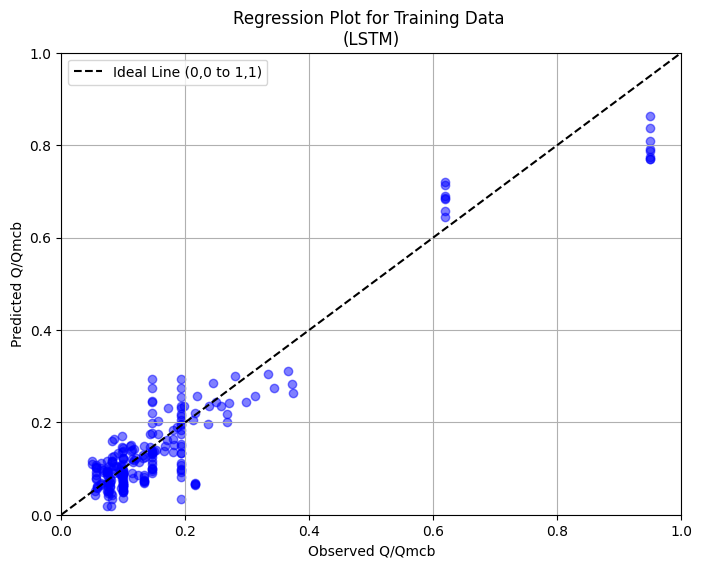

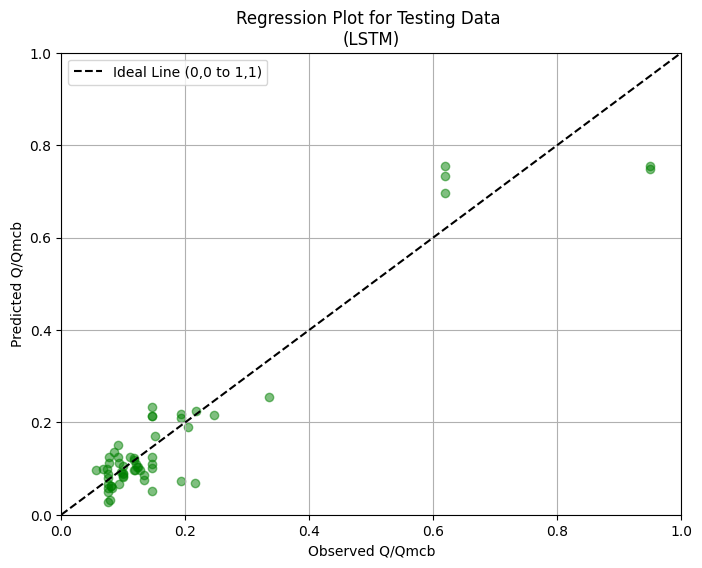

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
train_predictions = lstm_model.predict(X_train)
test_predictions = lstm_model.predict(X_test)

# Function to plot regression with custom colors
def plot_regression(y_true, y_pred, title, point_color):
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x=y_true,
        y=y_pred,
        scatter_kws={'alpha': 0.5, 'color': point_color},  # Set point color
        line_kws={'color': 'red', 'label': 'Regression Fit'},
        fit_reg=False
    )

    # Add a line from (0, 0) to (1, 1)
    plt.plot([0, 1], [0, 1], 'k--', label='Ideal Line (0,0 to 1,1)')  # Black dashed line

    plt.title(title)
    plt.xlabel('Observed Q/Qmcb')
    plt.ylabel('Predicted Q/Qmcb')
    plt.xlim(0, 1)  # Setting the x-axis limit from 0 to 1
    plt.ylim(0, 1)  # Setting the y-axis limit from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the regression plot function for training data with blue points
plot_regression(y_train, train_predictions.flatten(), 'Regression Plot for Training Data \n(LSTM)', point_color='blue')

# Call the regression plot function for testing data with green points
plot_regression(y_test, test_predictions.flatten(), 'Regression Plot for Testing Data \n(LSTM)', point_color='green')


In [ ]:
from matplotlib import rcParams
from matplotlib import rcParamsDefault

# Reset to default settings
rcParams.update(rcParamsDefault)

# left from report

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


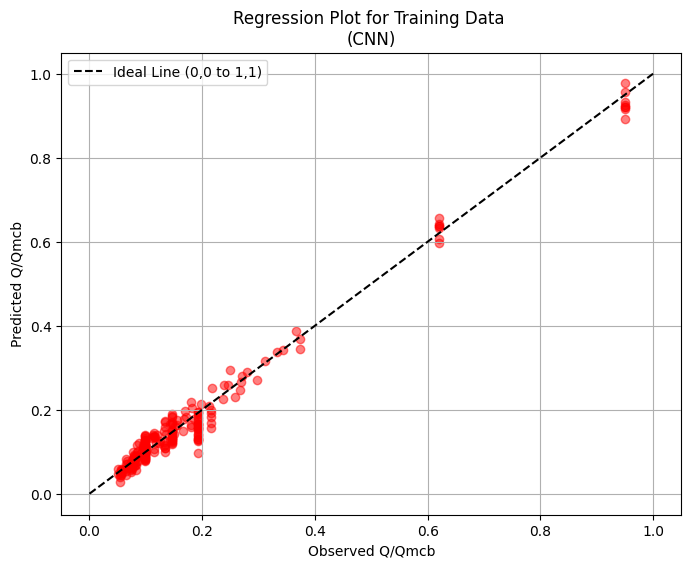

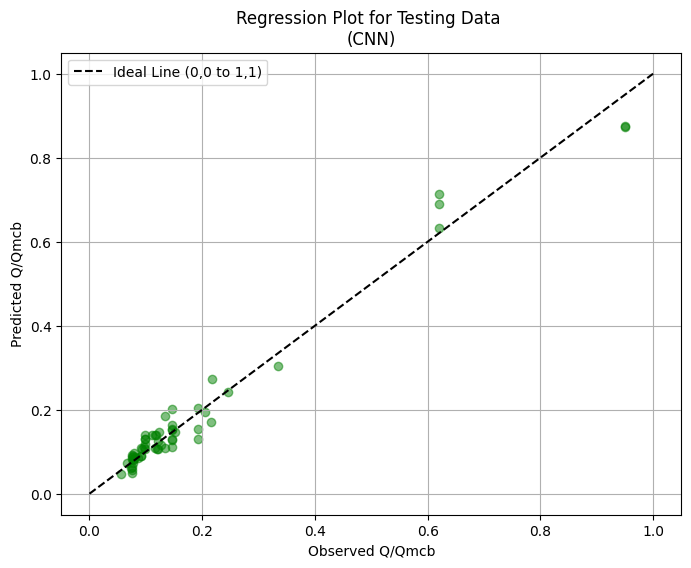

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
train_predictions = cnn_model.predict(X_train)
test_predictions = cnn_model.predict(X_test)

# Function to plot regression
def plot_regression(y_true, y_pred, title, scatter_color):
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x=y_true,
        y=y_pred,
        scatter_kws={'alpha': 0.5, 'color': scatter_color},
        line_kws={'color': 'red'},  # Regression line color
        fit_reg=False  # Disables regression line fit
    )

    # Add a line from (0, 0) to (1, 1)
    plt.plot([0, 1], [0, 1], 'k--', label='Ideal Line (0,0 to 1,1)')  # Black dashed line

    plt.title(title)
    plt.xlabel('Observed Q/Qmcb')
    plt.ylabel('Predicted Q/Qmcb')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the regression plot function for training data (red points)
plot_regression(y_train, train_predictions.flatten(), 'Regression Plot for Training Data \n(CNN)', scatter_color='red')

# Call the regression plot function for testing data (green points)
plot_regression(y_test, test_predictions.flatten(), 'Regression Plot for Testing Data \n(CNN)', scatter_color='green')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


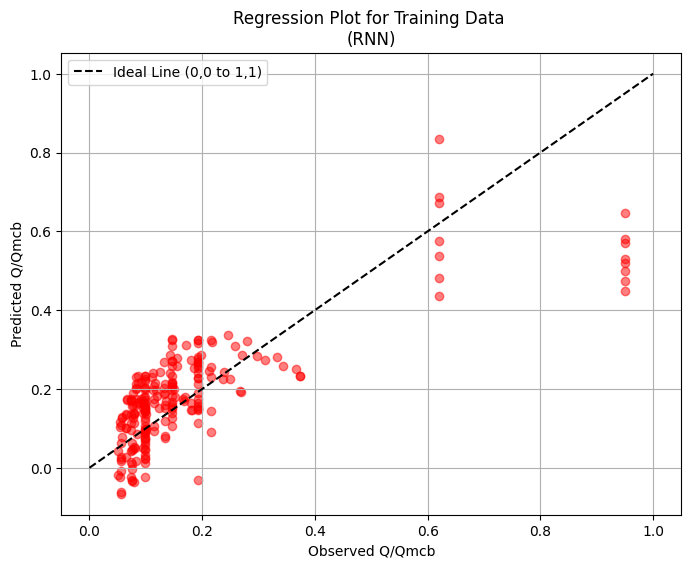

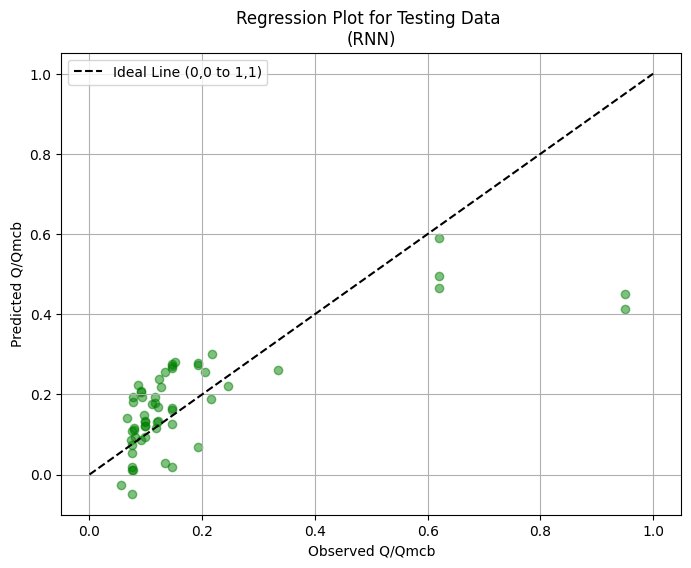

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
train_predictions = rnn_model.predict(X_train)
test_predictions = rnn_model.predict(X_test)

# Function to plot regression
def plot_regression(y_true, y_pred, title, scatter_color):
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x=y_true,
        y=y_pred,
        scatter_kws={'alpha': 0.5, 'color': scatter_color},  # Custom scatter color
        line_kws={'color': 'red'},  # Line color
        fit_reg=False  # No regression line
    )

    # Add a line from (0, 0) to (1, 1)
    plt.plot([0, 1], [0, 1], 'k--', label='Ideal Line (0,0 to 1,1)')  # Black dashed line

    plt.title(title)
    plt.xlabel('Observed Q/Qmcb')
    plt.ylabel('Predicted Q/Qmcb')
    plt.grid(True)
    plt.legend()  # Add legend for the dashed line
    plt.show()

# Call the regression plot function for training data (red points)
plot_regression(y_train, train_predictions.flatten(), 'Regression Plot for Training Data \n(RNN)', scatter_color='red')

# Call the regression plot function for testing data (green points)
plot_regression(y_test, test_predictions.flatten(), 'Regression Plot for Testing Data \n(RNN)', scatter_color='green')


In [ ]:
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Assume X_train and X_test are already defined properly with the correct shape
# Corrected CNN Model
cnn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Specify input shape explicitly
    Conv1D(64, kernel_size=1, activation='relu'),      # Use kernel_size=1 since sequence length is 1
    Flatten(),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the CNN model
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predict with CNN model and print predictions for each batch
for i in range(0, len(X_test), 8):  # assuming batch size is 8
    X_batch = X_test[i:i+8]
    y_pred_batch = cnn_model.predict(X_batch)
    print(f"Batch {i//8+1} predictions:", y_pred_batch.flatten())


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0398 - mae: 0.1222 - val_loss: 0.0361 - val_mae: 0.0883
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0283 - mae: 0.0781 - val_loss: 0.0298 - val_mae: 0.0940
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232 - mae: 0.0853 - val_loss: 0.0252 - val_mae: 0.0902
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mae: 0.0823 - val_loss: 0.0224 - val_mae: 0.0825
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196 - mae: 0.0814 - val_loss: 0.0196 - val_mae: 0.0763
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mae: 0.0598 - val_loss: 0.0169 - val_mae: 0.0720
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mae: 0.0611 - val_loss: 0.0143 - val_mae: 0.0683
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mae: 0.0755 - val_loss: 0.0126 - val_mae: 0.0624
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mae:

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Assume X_train and X_test are already defined properly with the correct shape
# Corrected CNN Model
cnn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Specify input shape explicitly
    Conv1D(64, kernel_size=1, activation='relu'),      # Use kernel_size=1 since sequence length is 1
    Flatten(),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the CNN model
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predict with CNN model for all test data at once
cnn_y_pred = cnn_model.predict(X_test)

# Display the predictions
print("Predictions for the entire test set:", cnn_y_pred.flatten())


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1255 - mae: 0.2902 - val_loss: 0.0530 - val_mae: 0.1570
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0435 - mae: 0.1474 - val_loss: 0.0348 - val_mae: 0.1140
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365 - mae: 0.1226 - val_loss: 0.0277 - val_mae: 0.0925
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mae: 0.0962 - val_loss: 0.0248 - val_mae: 0.0815
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mae: 0.0760 - val_loss: 0.0226 - val_mae: 0.0854
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mae: 0.0761 - val_loss: 0.0210 - val_mae: 0.0808
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mae: 0.0799 - val_loss: 0.0200 - val_mae: 0.0782
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mae: 0.0698 - val_loss: 0.0187 - val_mae: 0.0764
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199 - mae: